--PART1--

In [8]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')



data_path = '/content/drive/MyDrive/AAX/Seminar1'

# Leemos el archivo como antes (ajusta el delimitador si es necesario)
df = pd.read_csv(data_path + "/dataset_Seminar1.txt", delimiter=" ", header=None)

# Definimos los nombres de las columnas
column_names = [
    "Number of STA", "Load", "Size X", "Size Y", "Area xy",
    "Contention Window", "Channel Width", "Packet Size",
    "MAX RSSI", "AVG RSSI", "MIN RSSI",
    "AVG. Prob of failure", "Throughput", "Average Delay",
    "Total Airtime", "Proportional Airtime"
]


# Asignamos los nombres al DataFrame
df.columns = column_names

# Verificamos que quedó bien
print(df.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Number of STA        Load  Size X  Size Y  Area xy  Contention Window  \
0           40.0  60000000.0    22.0    39.0    858.0               63.0   
1           35.0  52500000.0    20.0    33.0    660.0               31.0   
2           16.0  12000000.0    34.0    14.0    476.0              255.0   
3           37.0  18500000.0    35.0     7.0    245.0               31.0   
4           18.0   4500000.0    36.0    35.0   1260.0              127.0   

   Channel Width  Packet Size   MAX RSSI   AVG RSSI   MIN RSSI  \
0           80.0       4000.0 -42.928330 -63.163012 -74.965338   
1           40.0      10000.0 -47.815800 -63.298410 -72.847989   
2           40.0       4000.0 -46.138494 -60.076333 -70.044800   
3           80.0      10000.0 -42.708813 -60.141393 -72.029643   
4          160.0       8000.0 -45.492991 -63.780783 -76.225550   

   AVG. Prob of f

In [9]:
# Seleccionamos solo las columnas relacionadas con rendimiento
relevant_columns = [
    "AVG. Prob of failure", "Throughput", "Average Delay",
    "Total Airtime", "Proportional Airtime"
]

# Media por columna relevante
print("Media (promedio) de métricas clave:\n", df[relevant_columns].mean())

# Desviación estándar por columna relevante
print("\nDesviación estándar de métricas clave:\n", df[relevant_columns].std())



Media (promedio) de métricas clave:
 AVG. Prob of failure    2.266761e-01
Throughput              9.716009e+06
Average Delay           4.688176e+06
Total Airtime           7.805603e-01
Proportional Airtime    6.607240e-01
dtype: float64

Desviación estándar de métricas clave:
 AVG. Prob of failure    2.248476e-01
Throughput              4.958025e+06
Average Delay           7.875887e+06
Total Airtime           3.604263e-01
Proportional Airtime    2.567557e-01
dtype: float64


   Number of STA        Load  Size X  Size Y  Area xy  Contention Window  \
0           40.0  60000000.0    22.0    39.0    858.0               63.0   
1           35.0  52500000.0    20.0    33.0    660.0               31.0   
2           16.0  12000000.0    34.0    14.0    476.0              255.0   
3           37.0  18500000.0    35.0     7.0    245.0               31.0   
4           18.0   4500000.0    36.0    35.0   1260.0              127.0   

   Channel Width  Packet Size   MAX RSSI   AVG RSSI   MIN RSSI  \
0           80.0       4000.0 -42.928330 -63.163012 -74.965338   
1           40.0      10000.0 -47.815800 -63.298410 -72.847989   
2           40.0       4000.0 -46.138494 -60.076333 -70.044800   
3           80.0      10000.0 -42.708813 -60.141393 -72.029643   
4          160.0       8000.0 -45.492991 -63.780783 -76.225550   

   AVG. Prob of failure    Throughput  Average Delay  Total Airtime  \
0              0.415189  7.208644e+06   1.229466e+07       1.084041   
1   

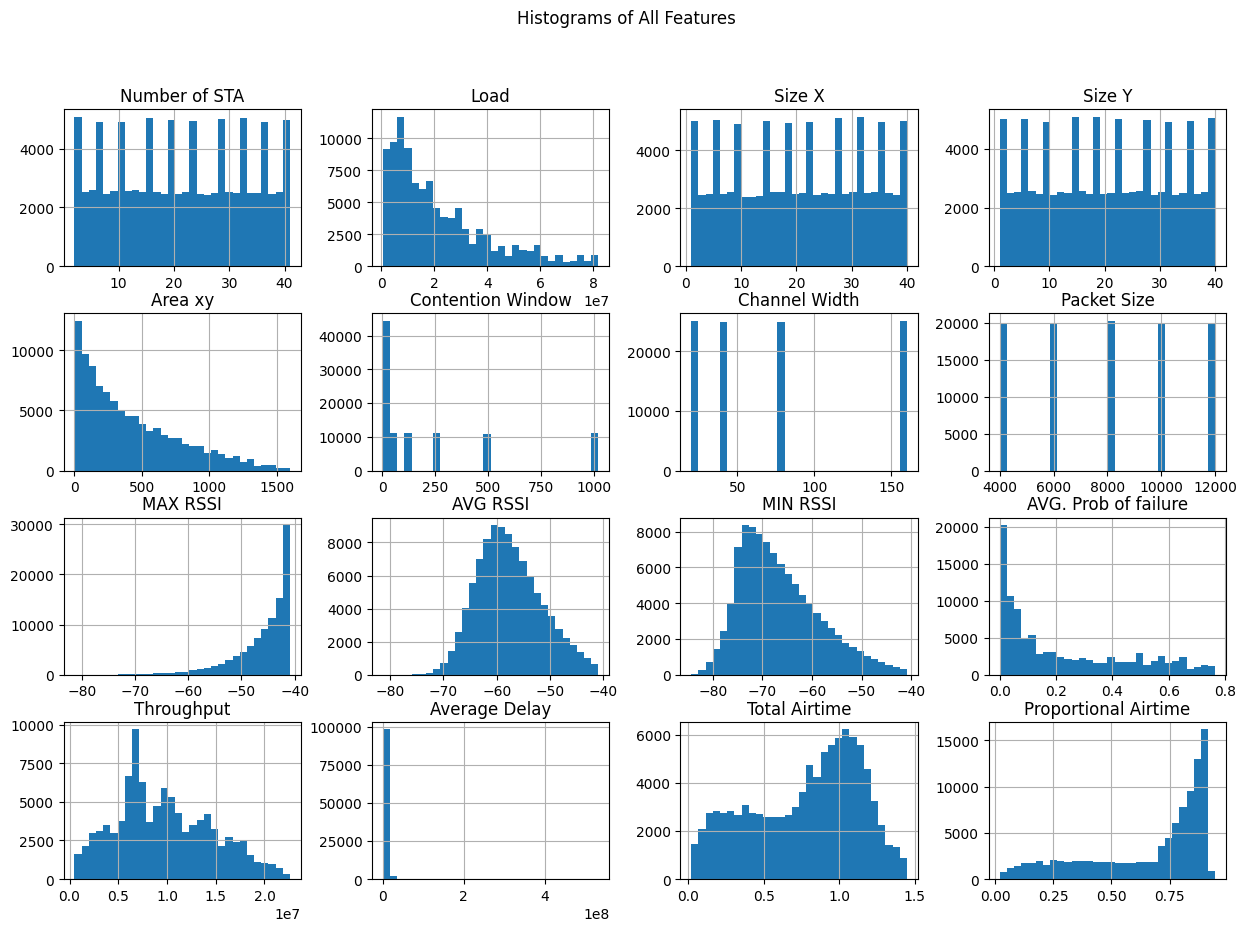

In [10]:
#Plot of relevant figures
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(df.head())
print(df.info())
print(df.describe())
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of All Features')
plt.show()



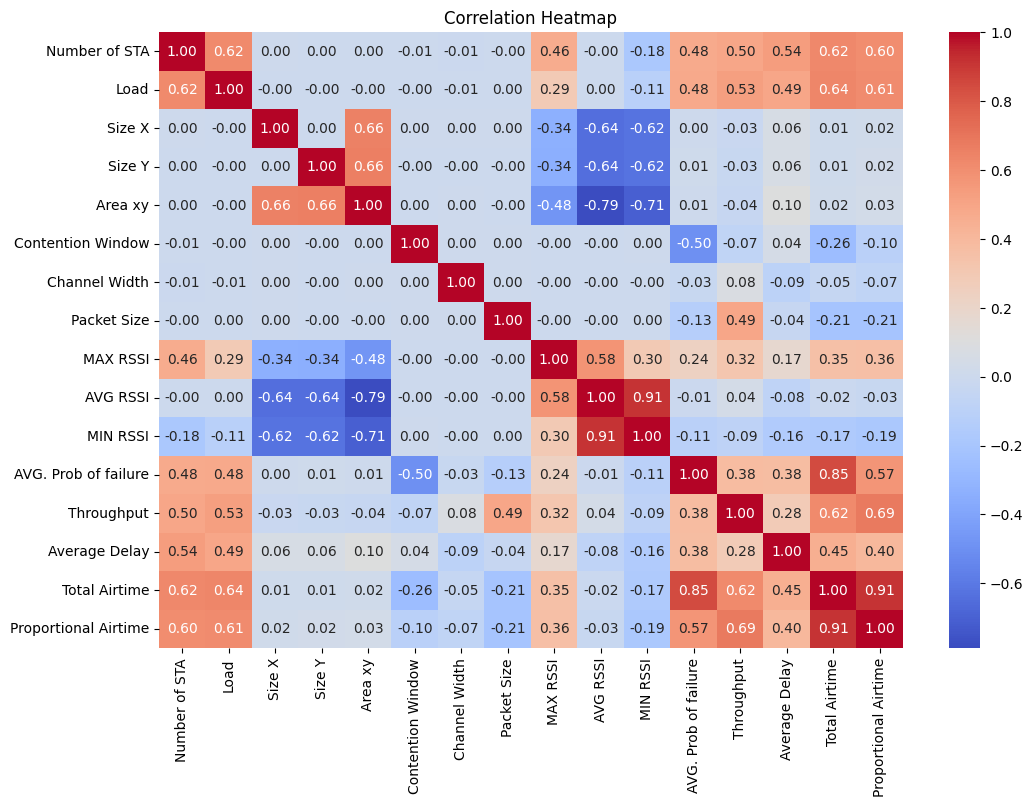

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


As we have obtained the mean and the standard deviation from the most important attributes of the dataset, we will consider the using the 1.5IQR method and normalization involving the mean and the variance as our methods to normalize the dataset.

In [12]:
import pandas as pd
import numpy as np


# 1. IQR Outlier Filtering (in-place)
print("Original data shape:", df.shape)

columns_to_process = [
    'AVG. Prob of failure',
    'Throughput',
    'Average Delay',
    'Total Airtime',
    'Proportional Airtime'
]

for col in columns_to_process:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        # Filter outliers
        mask = (df[col] >= lower_bound) & (df[col] <= upper_bound)
        df = df[mask]
        print(f"Filtered {col}: New shape {df.shape}")

# 2. Normalization using your mean/std (in-place)
stats = {
    'AVG. Prob of failure': {'mean': 0.2266761, 'std': 0.2248476},
    'Throughput': {'mean': 9716009, 'std': 4958025},
    'Average Delay': {'mean': 4688176, 'std': 7875887},
    'Total Airtime': {'mean': 0.7805603, 'std': 0.3604263},
    'Proportional Airtime': {'mean': 0.6607240, 'std': 0.2567557}
}

for col, params in stats.items():
    if col in df.columns:
        df[col] = (df[col] - params['mean']) / params['std']
        print(f"Normalized {col} (mean≈{df[col].mean():.2f}, std≈{df[col].std():.2f})")

# 3. Save to Normalized_data.txt
output_filename = 'Normalized_data.txt'
df.to_csv(output_filename, sep='\t', index=False)  # Tab-delimited text file

print("\nProcessing complete!")
print("Final data shape:", df.shape)
print(f"Saved to {output_filename}")




Original data shape: (100000, 16)
Filtered AVG. Prob of failure: New shape (100000, 16)
Filtered Throughput: New shape (100000, 16)
Filtered Average Delay: New shape (99207, 16)
Filtered Total Airtime: New shape (99207, 16)
Filtered Proportional Airtime: New shape (99207, 16)
Normalized AVG. Prob of failure (mean≈-0.01, std≈1.00)
Normalized Throughput (mean≈-0.00, std≈1.00)
Normalized Average Delay (mean≈-0.04, std≈0.65)
Normalized Total Airtime (mean≈-0.01, std≈1.00)
Normalized Proportional Airtime (mean≈-0.01, std≈1.00)

Processing complete!
Final data shape: (99207, 16)
Saved to Normalized_data.txt


Now we proceed to do the data split where we keep 80% for trainning and 20% for testing

In [25]:
from sklearn.model_selection import train_test_split

# Assuming your normalized data is in the DataFrame 'df'
# Perform the split (keeping all columns together)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



--PART2--

In [26]:
# linear_regression_module.py

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


class LinearRegressionModel:
    def __init__(self):
        self.model = LinearRegression()

    def load_data(self, X_train, X_val, y_train, y_val):
        self.X_train = X_train
        self.X_val = X_val
        self.y_train = y_train
        self.y_val = y_val

    def fit(self):
        self.model.fit(self.X_train, self.y_train)

    def evaluate(self):
        y_train_pred = self.model.predict(self.X_train)
        y_val_pred = self.model.predict(self.X_val)

        train_mse = mean_squared_error(self.y_train, y_train_pred)
        val_mse = mean_squared_error(self.y_val, y_val_pred)
        train_r2 = r2_score(self.y_train, y_train_pred)
        val_r2 = r2_score(self.y_val, y_val_pred)

        return {
            "train_mse": train_mse,
            "val_mse": val_mse,
            "train_r2": train_r2,
            "val_r2": val_r2
        }

    def plot_results(self):
        y_val_pred = self.model.predict(self.X_val)

        plt.figure(figsize=(10, 5))

        # Plot 1: Actual vs Predicted
        plt.subplot(1, 2, 1)
        plt.scatter(self.y_val, y_val_pred, alpha=0.7, color='blue')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Actual vs Predicted")

        # Plot 2: Residuals
        residuals = self.y_val - y_val_pred
        plt.subplot(1, 2, 2)
        plt.hist(residuals, bins=20, color='orange', edgecolor='black')
        plt.xlabel("Residuals")
        plt.ylabel("Frequency")
        plt.title("Residuals Distribution")

        plt.tight_layout()
        plt.show()


Model Evaluation:
train_mse: 0.0233
val_mse: 0.0234
train_r2: 0.9768
val_r2: 0.9765


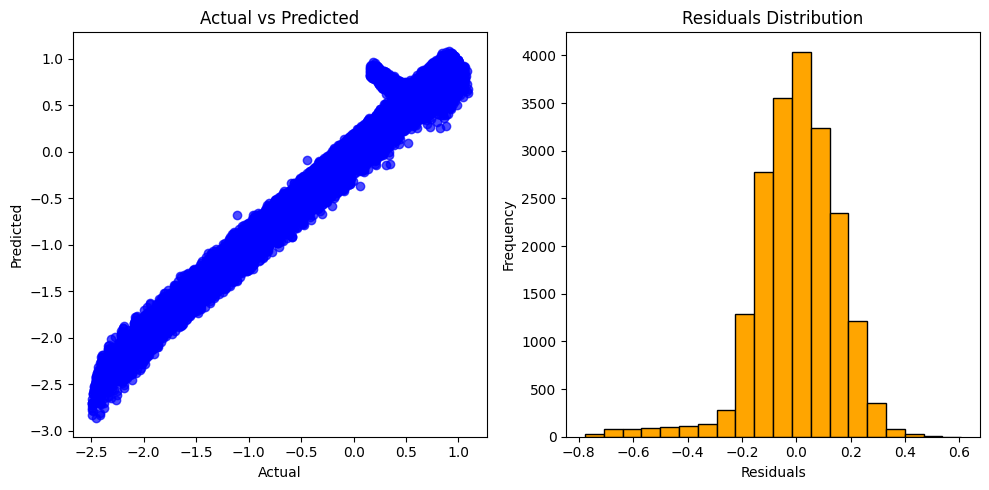

In [27]:
model = LinearRegressionModel()
model.load_data(X_train, X_val, y_train, y_val)
model.fit()

metrics = model.evaluate()
print("Model Evaluation:")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

model.plot_results()
